# **Compte rendu Mouvement rétrograde de Mars Vuillin Hugo**


##  I-Présentation du modèle :
On cherche à modéliser le mouvement de la rétrograde de Mars. Ce mouvement est périodique, il a lieu tous les 2 ans on observe ainsi que Mars fais une sorte de demi tour lors de son ellipse autour du Soleil.
Pour cela on tracera deux courbes:
Pour la première on calculera la longitude ϕ de Mars vue depuis la Terre dans le référentiel héliocentrique en fonction du temps.
Pour la seconde on utilisera le fichier csv fourni contenant des données sur la longitude et latitude de Mars entre 2014 et 2017 et l'on y extraira les colonnes comportant le moouvement qui nous
intéresse et à l'aide d'un tableau de jours correspondant à la longuer du tableau des longitudes on tracera le mouvement souhaité.

On trouvera ici une image des considérations que l'on fait pour calculer notre angle.

![solar Image](https://jupyterhub-23.capsule.upmc.fr/user/24543/files/etu-demarche-de-modelisation/Untitled%20Folder%201/solar.png?_xsrf=2%7Cc740dc89%7C057cf04ef14e2d11f0e024af1c2a39c2%7C1704721275![solar.png](attachment:ddf8cac3-fa37-460c-a827-05917a3d3d0c.png)

## II-Calcul de ϕ apparent
Intéressons nous d'abord au calcul de ϕ:

On se place dans le réferentiel héliocentrique en supposant les mouvements de Mars et de la Terre comme circulaire unifome et on écrit les équations du mouvement selon x et y :
$$
\left\{
    \begin{array}{lll}
X(t)=Rcos(ωt+ϕ) \\
Y(t)=Rsin(ωt+ϕ) \\
ϕ_0=0 \\
ω=\frac{2\pi}{T} 
    \end{array}
\right.
$$
On calcule alors Ymars-Yterre et Xmars-Xterre et on utilise la fonction arctan2 pour avoir ϕapp.
Pour avoir des résultats cohérents on trace ϕapp sur 3 ans on constate alors que sur la dernière année on trouve le mouvement rétrograde. On a alors notre t0=620.5 jours et 
notre tf=925.5 avec un pas de 1 jour et l'on crée une liste de 305 jours et en convertissant ϕapp en degré on obtient notre courbe.

#### Grandeurs utiles :

Rayon de l'orbite de la Terre : 1 UA  
Période de révolution de la Terre : 365.256 jours  
Rayon de l'orbite de Mars : 1.52371 UA  
Période de révolution de Mars : 686.885 jours


## III-Code Python du modèle

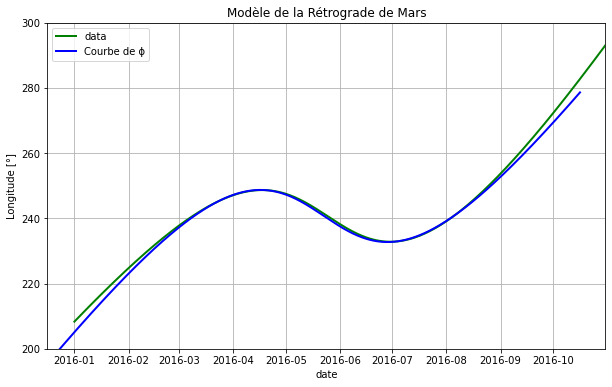

In [1]:
import pandas as pd
import time
from  datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
# On définit nos constantes pour le problème en faisant les conversions en m et en jours.
rayon_orbitalTerre=1.496e11 #m 
rayon_orbitalMars=2.279438e11 #m
T_Terre=365
T_Mars=686.885
t0=620.5  #jours
tf=925.5  #jours  
pas= 1 # On choisit un pas d'un jour cela devrait permmettre de plot une courbe bien faite à l'aide de 305 points.
num_points=int(tf/pas)+1
t=np.linspace(t0,tf,num_points)# On définit notre tableau de valeur de t

# En se placant dans le référentiel héliocentrique on écrit les équations du mouvement pour X et Y
xTerre=rayon_orbitalTerre*np.cos((2*np.pi*t)/T_Terre)
yTerre=rayon_orbitalTerre*np.sin((2*np.pi*t)/T_Terre)

xMars=rayon_orbitalMars*np.cos((2*np.pi*t)/T_Mars)
yMars=rayon_orbitalMars*np.sin((2*np.pi*t)/T_Mars)


phi_apparent=192.5+np.arctan2((yMars-yTerre),(xMars-xTerre))*180/np.pi # Sans le 192.5 la longitude est négative alors qu'elle est sensiblement, la même que dans le fichier .csv sans cela cette courbe serait bien en dessous de l'autre

df=pd.read_csv('DataMars.csv',comment='#') # On crée notre DataFrame
tAstro_calendrier = np.arange('2016-01-01', '2016-11-01', dtype='datetime64[D]')# tableau avec tous les jours du mois de janvier jusqu'à novembre pour avoir des graduations lisibles lorsque l'on tracera la fonction car si on utilise le DataFrame toutes les valeurs seront en graduation rendant le graphe illisible.
fig, ax = plt.subplots(figsize=(10, 6))
slice_ = slice(306,610)
x_donnees=df.loc[slice_,'Longitude (decimal)'] #On attribue l'intervalle longitudinal où se produit le mouvement rétrograde de Mars.
plt.plot(tAstro_calendrier,x_donnees,'g-',linewidth=2,label = 'data')
plt.plot(t+16165,(phi_apparent),'b-',linewidth=2,label='Courbe de ϕ')# Le 16165 est un nombre de jour car lorsque je traçais les deux courbes celle de ϕ se trouvaient en 1960 ce terme ajuste donc les positions des courbes.
plt.legend()
plt.grid()
plt.title('Modèle de la Rétrograde de Mars')
plt.ylim(200,300)
plt.ylabel('Longitude [°]')
plt.xlabel('date')
plt.margins(0,0)# On définit les marges de x et y à 0 le graphique commence et finit en suivant la plus grande courbe.

plt.show()

## IV-Résultats
On voit que les courbes coincident bien sur le moment où Mars est censée effectuer sa boucle les deux courbes se superposent presque partout sauf au début et à la fin où l'on observe que la courbe bleue commence à diverger de l'autre. On voit graphiquement que le centre de la boucle est bien à 240.5° en fin mai 2016 ce à quoi On en conclut que le modèle est plutôt réussi. On peut donc calculer avec précision de manière simple la longitude de Mars avec une assez bonne précision et ce depuis l'Antiquité. 



## V-Conclusion

On a donc réussi à modéliser de deux manières différentes le mouvement rétrograde de Mars et les deux courbes coincident plutôt bien à part aux extrêmités.
On rappelle que l'on a calculé la longitude de Mars depuis la Terre en fonction du temps et que l'on a tracé cette dernière en fonction du temps grâce aux équations du mouvement de Mars et de la Terre.
Pour la seconde courbe on utilise le fichier DataMars.csv à partir duquel on extrait les valeurs de longitude de l'année 2016, quand le mouvement, a lieu à l'aide de la bibliotheque panda.

Cependant le modèle n'est pas totalement réaliste on considère un mouvement circulaire uniforme de la Terre et de Mars autour du Soleil alors qu'en réalité ce mouvement est une ellipse. Le système d'équations ne serait donc pas le même car les forces de gravitation et vitesse changeraient selon la position des planètes.
On pourrait aussi améliorer le programme python pour ne pas avoir le problème de différence de temps lorsque que l'on trace les deux courbes cela pourrait se faire en améliorant probablement la liste de temps pour ϕ où la convertir en tableau "datetime". 
De plus la valeur de la phase à l'origine aurait pu prendre la valeur de 240.5° et il aurait probablement fallu changer d'autres paramètres.

Enfin il serait donc intéressant de refaire ce modèle en prenant l'hypothèse d'une ellipse pour avoir un modèle qui s'approche encore plus de la réalité et de voir si nos courbes se superposent toujours aussi bien.
